In [1]:
import gzip
import pandas
import pickle
import seaborn
import tqdm

from lib.models.aft20barzur import ptmdp
from lib.models.generic_v0.model import map_params

In [2]:
import sys

util_dir = "./sprint-0-explicit-mdps/"
sys.path.append(util_dir)

import util

sys.path.remove(util_dir)

In [3]:
mdps = pandas.read_pickle("5-generated-mdps/fixed.pkl.gz")
mdps

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,time_spent,rss,mdp
0,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,6,47,0.001509,0.173466,5120bfb4
1,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,6,37,0.000923,0.174320,723cfa04
2,v1,generic-v1,False,False,True,True,False,bitcoin,6,21327,15.098163,0.345097,b275c213
3,v1,generic-v1,False,False,True,True,False,ethereum_3,6,32961,24.124619,0.444359,5f2d21fe
4,v1,generic-v1,False,False,True,True,False,byzantium_3,6,33016,26.021732,0.445122,6236f7ec
5,v1,generic-v1,False,False,True,True,False,ghostdag_3,6,46966,44.522669,0.543056,1df09c2a
6,v1,generic-v1,False,False,True,True,False,parallel_3,6,9122,5.388767,0.275631,2b4ef9f2
7,v1+fc,generic-v1,True,False,True,True,False,bitcoin,6,549,0.256233,0.227562,76aa9418
8,v1+fc,generic-v1,True,False,True,True,False,ethereum_3,6,1179,0.750106,0.233639,102927ca
9,v1+fc,generic-v1,True,False,True,True,False,byzantium_3,6,1109,0.795671,0.238495,613575a9


In [4]:
networks = []
# for alpha in range(5, 51, 5):
for alpha in range(35, 41, 5):
    for gamma in [0.33, 0.66]:
        # for gamma in [0, 0.5, 1]:
        networks.append(dict(alpha=alpha / 100, gamma=gamma))
# pandas.DataFrame(networks)

In [5]:
horizon = 100
stop_delta = (
    0.0001  # value iteration stops when no value estimate changes more than this value
)

with tqdm.tqdm(total=len(networks) * len(mdps)) as pbar:
    rows = []
    for network in networks:
        for i, row in mdps.iterrows():
            with gzip.open(f"5-generated-mdps/mdp-{row.mdp}.pkl.gz", "rb") as f:
                emdp = pickle.load(f)
            emdp = map_params(emdp, **network)
            oae = util.optimize_and_evaluate(emdp, eps=stop_delta, horizon=horizon)
            rows.append(row.to_dict() | dict(horizon=horizon) | network | oae)
            pbar.update(1)

df = pandas.DataFrame(rows)
df.to_pickle("5-value-iterations.pkl.gz")
df

  0%|                                                                         | 0/96 [00:00<?, ?it/s]

  1%|▋                                                                | 1/96 [00:00<00:24,  3.85it/s]

  2%|█▎                                                               | 2/96 [00:00<00:20,  4.49it/s]

  3%|█▉                                                             | 3/96 [03:06<2:12:11, 85.28s/it]

  4%|██▌                                                           | 4/96 [08:41<4:41:45, 183.76s/it]

  5%|███▏                                                          | 5/96 [13:04<5:22:02, 212.33s/it]

  6%|███▉                                                          | 6/96 [18:34<6:18:20, 252.23s/it]

  7%|████▌                                                         | 7/96 [19:51<4:49:15, 195.00s/it]

  8%|█████▏                                                        | 8/96 [19:55<3:16:40, 134.10s/it]

  9%|█████▉                                                         | 9/96 [20:02<2:16:51, 94.38s/it]

 10%|██████▍                                                       | 10/96 [20:08<1:36:12, 67.13s/it]

 11%|███████                                                       | 11/96 [20:16<1:09:21, 48.96s/it]

 12%|████████                                                        | 12/96 [20:27<52:27, 37.48s/it]

 14%|████████▋                                                       | 13/96 [21:17<57:16, 41.41s/it]

 15%|█████████                                                     | 14/96 [22:54<1:19:12, 57.96s/it]

 16%|█████████▋                                                    | 15/96 [24:04<1:23:18, 61.72s/it]

 17%|██████████▎                                                   | 16/96 [25:27<1:30:58, 68.23s/it]

 18%|██████████▉                                                   | 17/96 [25:40<1:07:52, 51.55s/it]

 19%|████████████                                                    | 18/96 [25:42<47:42, 36.69s/it]

 20%|████████████▋                                                   | 19/96 [25:46<34:21, 26.77s/it]

 21%|█████████████▎                                                  | 20/96 [25:49<24:57, 19.70s/it]

 22%|██████████████                                                  | 21/96 [25:52<18:25, 14.74s/it]

 23%|██████████████▋                                                 | 22/96 [25:55<13:52, 11.25s/it]

 24%|███████████████▎                                                | 23/96 [25:59<10:56,  8.99s/it]

 25%|███████████████▎                                             | 24/96 [36:25<3:52:45, 193.97s/it]

 26%|███████████████▉                                             | 25/96 [36:25<2:40:49, 135.91s/it]

 27%|████████████████▊                                             | 26/96 [36:25<1:51:03, 95.20s/it]

 28%|█████████████████▏                                           | 27/96 [39:50<2:27:12, 128.00s/it]

 29%|█████████████████▊                                           | 28/96 [45:23<3:34:54, 189.63s/it]

 30%|██████████████████▍                                          | 29/96 [50:22<4:08:24, 222.45s/it]

 31%|███████████████████                                          | 30/96 [55:50<4:39:18, 253.92s/it]

 32%|███████████████████▋                                         | 31/96 [57:07<3:37:35, 200.85s/it]

 33%|████████████████████▎                                        | 32/96 [57:11<2:31:13, 141.78s/it]

 34%|████████████████████▉                                        | 33/96 [57:18<1:46:33, 101.48s/it]

 35%|█████████████████████▉                                        | 34/96 [57:25<1:15:26, 73.01s/it]

 36%|███████████████████████▎                                        | 35/96 [57:32<54:12, 53.32s/it]

 38%|████████████████████████                                        | 36/96 [57:43<40:42, 40.70s/it]

 39%|████████████████████████▋                                       | 37/96 [58:37<43:51, 44.60s/it]

 40%|████████████████████████▌                                     | 38/96 [1:00:12<57:48, 59.81s/it]

 41%|████████████████████████▍                                   | 39/96 [1:01:30<1:02:02, 65.31s/it]

 42%|█████████████████████████                                   | 40/96 [1:02:50<1:05:05, 69.74s/it]

 43%|██████████████████████████▍                                   | 41/96 [1:03:03<48:12, 52.60s/it]

 44%|███████████████████████████▏                                  | 42/96 [1:03:05<33:44, 37.50s/it]

 45%|███████████████████████████▊                                  | 43/96 [1:03:09<24:11, 27.38s/it]

 46%|████████████████████████████▍                                 | 44/96 [1:03:13<17:32, 20.24s/it]

 47%|█████████████████████████████                                 | 45/96 [1:03:16<12:50, 15.10s/it]

 48%|█████████████████████████████▋                                | 46/96 [1:03:19<09:35, 11.51s/it]

 49%|██████████████████████████████▎                               | 47/96 [1:03:23<07:33,  9.27s/it]

 50%|█████████████████████████████▌                             | 48/96 [1:14:40<2:47:37, 209.54s/it]

 51%|██████████████████████████████                             | 49/96 [1:14:40<1:54:59, 146.81s/it]

 52%|██████████████████████████████▋                            | 50/96 [1:14:40<1:18:50, 102.83s/it]

 53%|███████████████████████████████▎                           | 51/96 [1:18:09<1:40:50, 134.46s/it]

 54%|███████████████████████████████▉                           | 52/96 [1:24:15<2:29:33, 203.93s/it]

 55%|████████████████████████████████▌                          | 53/96 [1:29:16<2:47:09, 233.24s/it]

 56%|█████████████████████████████████▏                         | 54/96 [1:34:56<3:05:34, 265.12s/it]

 57%|█████████████████████████████████▊                         | 55/96 [1:36:15<2:23:04, 209.37s/it]

 58%|██████████████████████████████████▍                        | 56/96 [1:36:19<1:38:28, 147.70s/it]

 59%|███████████████████████████████████                        | 57/96 [1:36:26<1:08:38, 105.61s/it]

 60%|█████████████████████████████████████▍                        | 58/96 [1:36:33<48:08, 76.02s/it]

 61%|██████████████████████████████████████                        | 59/96 [1:36:41<34:11, 55.45s/it]

 62%|██████████████████████████████████████▊                       | 60/96 [1:36:53<25:27, 42.42s/it]

 64%|███████████████████████████████████████▍                      | 61/96 [1:37:46<26:39, 45.71s/it]

 65%|████████████████████████████████████████                      | 62/96 [1:39:34<36:32, 64.48s/it]

 66%|████████████████████████████████████████▋                     | 63/96 [1:40:57<38:28, 69.95s/it]

 67%|█████████████████████████████████████████▎                    | 64/96 [1:42:27<40:26, 75.83s/it]

 68%|█████████████████████████████████████████▉                    | 65/96 [1:42:41<29:42, 57.49s/it]

 69%|██████████████████████████████████████████▋                   | 66/96 [1:42:44<20:27, 40.92s/it]

 70%|███████████████████████████████████████████▎                  | 67/96 [1:42:48<14:24, 29.81s/it]

 71%|███████████████████████████████████████████▉                  | 68/96 [1:42:51<10:15, 21.97s/it]

 72%|████████████████████████████████████████████▌                 | 69/96 [1:42:54<07:20, 16.33s/it]

 73%|█████████████████████████████████████████████▏                | 70/96 [1:42:58<05:22, 12.39s/it]

 74%|█████████████████████████████████████████████▊                | 71/96 [1:43:02<04:06,  9.87s/it]

 75%|████████████████████████████████████████████▎              | 72/96 [1:54:17<1:23:47, 209.47s/it]

 76%|██████████████████████████████████████████████▍              | 73/96 [1:54:17<56:15, 146.77s/it]

 77%|███████████████████████████████████████████████              | 74/96 [1:54:17<37:41, 102.81s/it]

 78%|███████████████████████████████████████████████▋             | 75/96 [1:58:04<49:01, 140.07s/it]

 79%|██████████████████████████████████████████████▋            | 76/96 [2:04:02<1:08:29, 205.46s/it]

 80%|███████████████████████████████████████████████▎           | 77/96 [2:09:15<1:15:14, 237.60s/it]

 81%|███████████████████████████████████████████████▉           | 78/96 [2:14:52<1:20:13, 267.42s/it]

 82%|██████████████████████████████████████████████████▏          | 79/96 [2:16:11<59:46, 210.97s/it]

 83%|██████████████████████████████████████████████████▊          | 80/96 [2:16:15<39:42, 148.91s/it]

 84%|███████████████████████████████████████████████████▍         | 81/96 [2:16:23<26:37, 106.48s/it]

 85%|████████████████████████████████████████████████████▉         | 82/96 [2:16:30<17:51, 76.54s/it]

 86%|█████████████████████████████████████████████████████▌        | 83/96 [2:16:37<12:04, 55.75s/it]

 88%|██████████████████████████████████████████████████████▎       | 84/96 [2:16:49<08:30, 42.56s/it]

 89%|██████████████████████████████████████████████████████▉       | 85/96 [2:17:49<08:45, 47.79s/it]

 90%|███████████████████████████████████████████████████████▌      | 86/96 [2:19:34<10:50, 65.03s/it]

 91%|████████████████████████████████████████████████████████▏     | 87/96 [2:20:58<10:36, 70.72s/it]

 92%|████████████████████████████████████████████████████████▊     | 88/96 [2:22:27<10:10, 76.37s/it]

 93%|█████████████████████████████████████████████████████████▍    | 89/96 [2:22:42<06:45, 57.86s/it]

 94%|██████████████████████████████████████████████████████████▏   | 90/96 [2:22:45<04:07, 41.32s/it]

 95%|██████████████████████████████████████████████████████████▊   | 91/96 [2:22:49<02:30, 30.12s/it]

 96%|███████████████████████████████████████████████████████████▍  | 92/96 [2:22:52<01:28, 22.16s/it]

 97%|████████████████████████████████████████████████████████████  | 93/96 [2:22:55<00:49, 16.44s/it]

 98%|████████████████████████████████████████████████████████████▋ | 94/96 [2:22:59<00:24, 12.46s/it]

 99%|█████████████████████████████████████████████████████████████▎| 95/96 [2:23:03<00:10, 10.15s/it]

100%|█████████████████████████████████████████████████████████████| 96/96 [2:35:32<00:00, 231.67s/it]

100%|██████████████████████████████████████████████████████████████| 96/96 [2:35:32<00:00, 97.21s/it]

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value
0,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,6,47,...,0.256362,41.488150,19,19,0.001124,2,0.291043,0.382590,0.258417,37.955464
1,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,6,37,...,0.194017,40.935026,17,17,0.000691,2,0.170436,0.379228,0.195189,37.484435
2,v1,generic-v1,False,False,True,True,False,bitcoin,6,21327,...,185.291644,39.915645,51,51,0.001204,2,0.122764,0.376756,185.707591,37.418087
3,v1,generic-v1,False,False,True,True,False,ethereum_3,6,32961,...,332.871221,54.587743,358,358,0.010391,2,0.147444,0.517720,333.687045,51.900674
4,v1,generic-v1,False,False,True,True,False,byzantium_3,6,33016,...,261.068513,38.847706,112,112,0.001898,2,0.133738,0.365944,261.818432,36.387480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,v1+fc+n,generic-v1,True,True,True,True,False,byzantium_3,6,572,...,3.553273,49.183393,89,89,0.001489,2,0.187768,0.476153,3.562649,47.188410
92,v1+fc+n,generic-v1,True,True,True,True,False,ghostdag_3,6,604,...,3.088912,43.044988,58,58,0.001210,2,0.195502,0.411071,3.098398,40.498923
93,v1+fc+n,generic-v1,True,True,True,True,False,parallel_3,6,492,...,3.173418,55.061477,112,112,0.001877,2,0.192119,0.543091,3.180918,53.057489
94,v0+fc+n,generic-v0,True,True,True,True,True,bitcoin,6,501,...,4.656467,57.377046,64,64,0.001240,2,0.198653,0.551257,4.665534,54.775965


# Reward per progress, source model, steady state

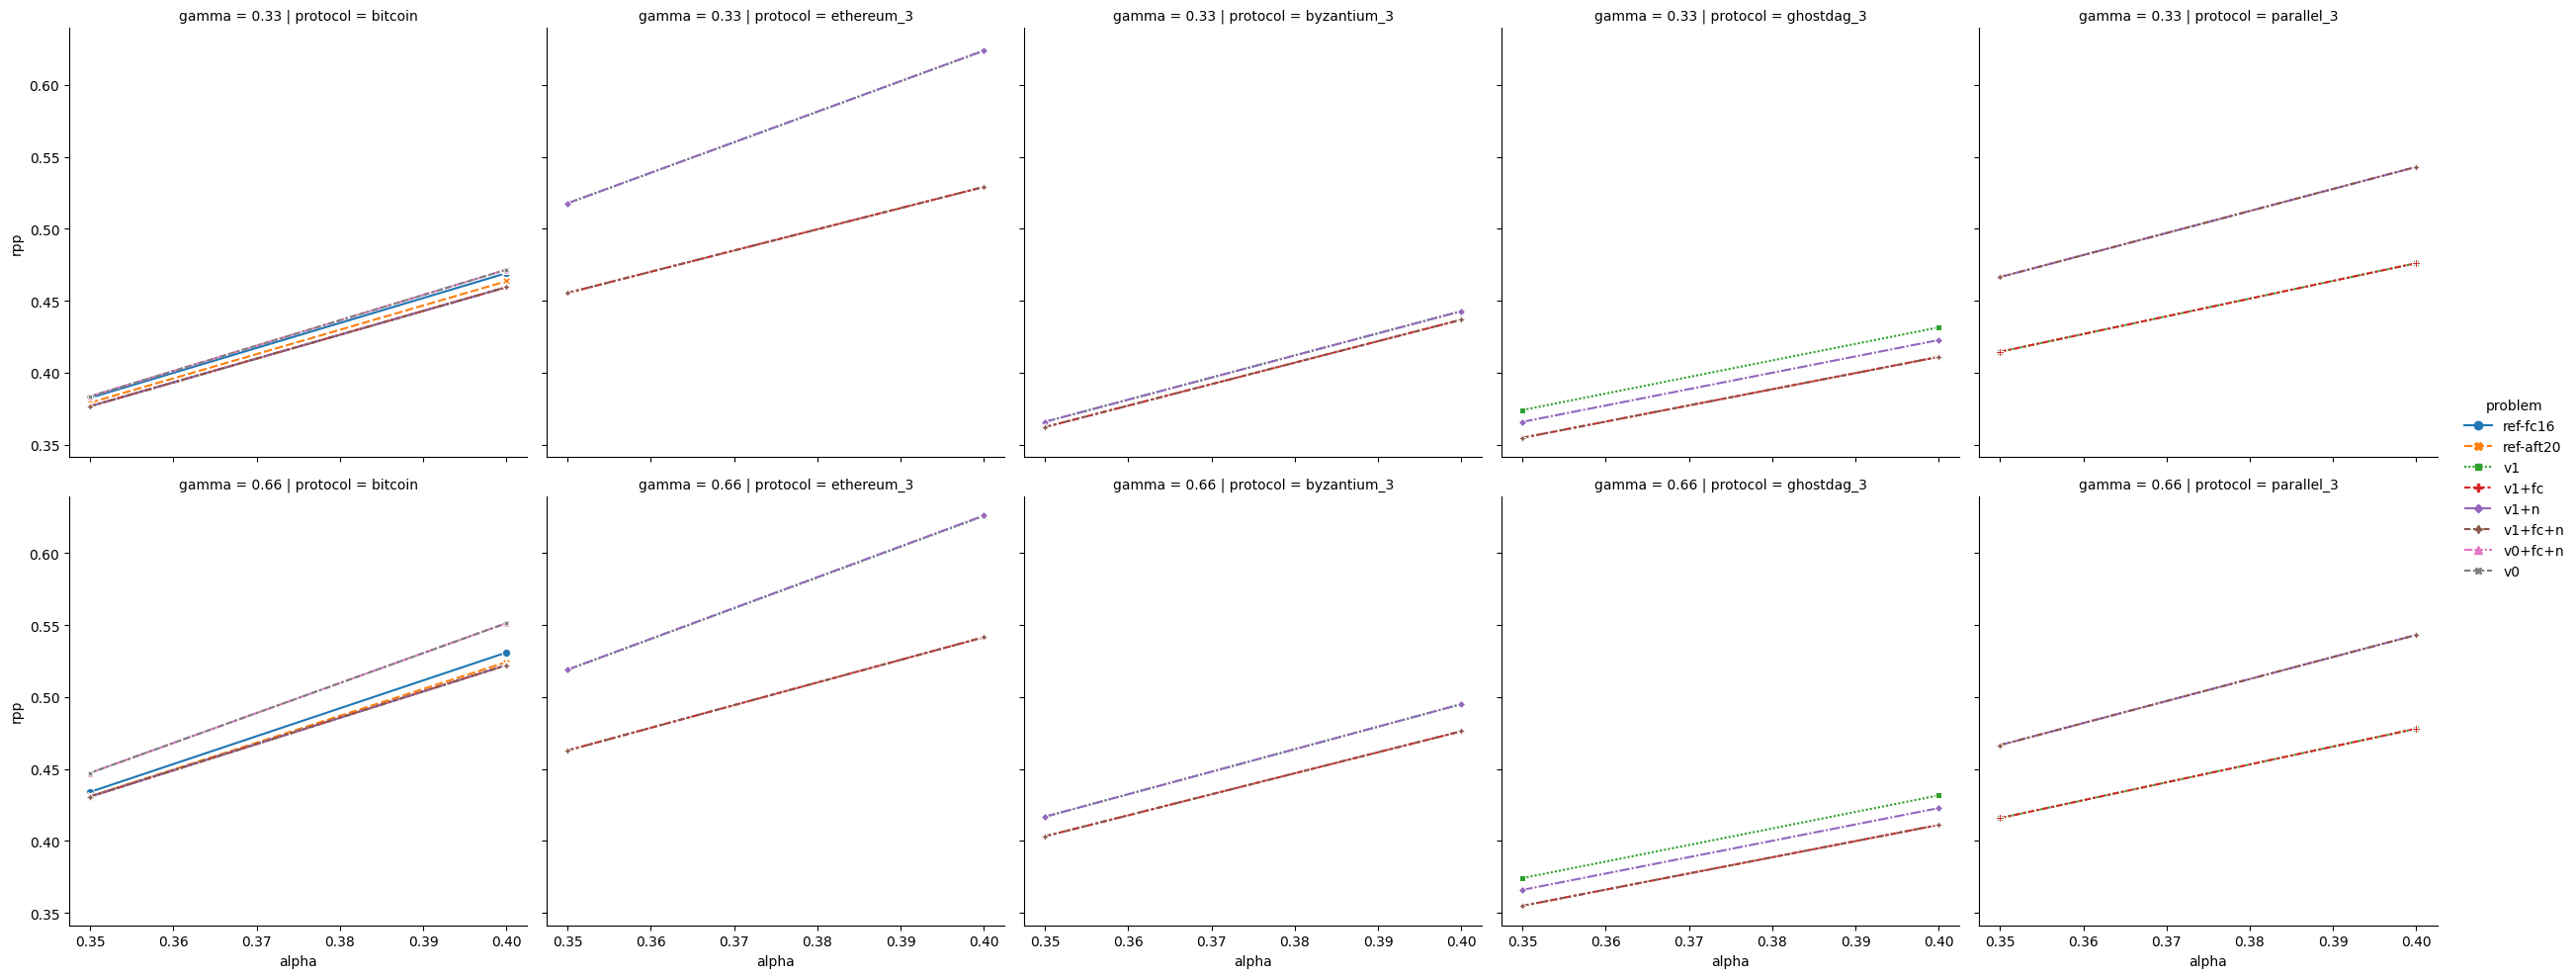

In [6]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="rpp",
    col="protocol",
    hue="problem",
    style="problem",
    markers=True,
    row="gamma",
)

# Revenue, PTO model, at source-model steady state

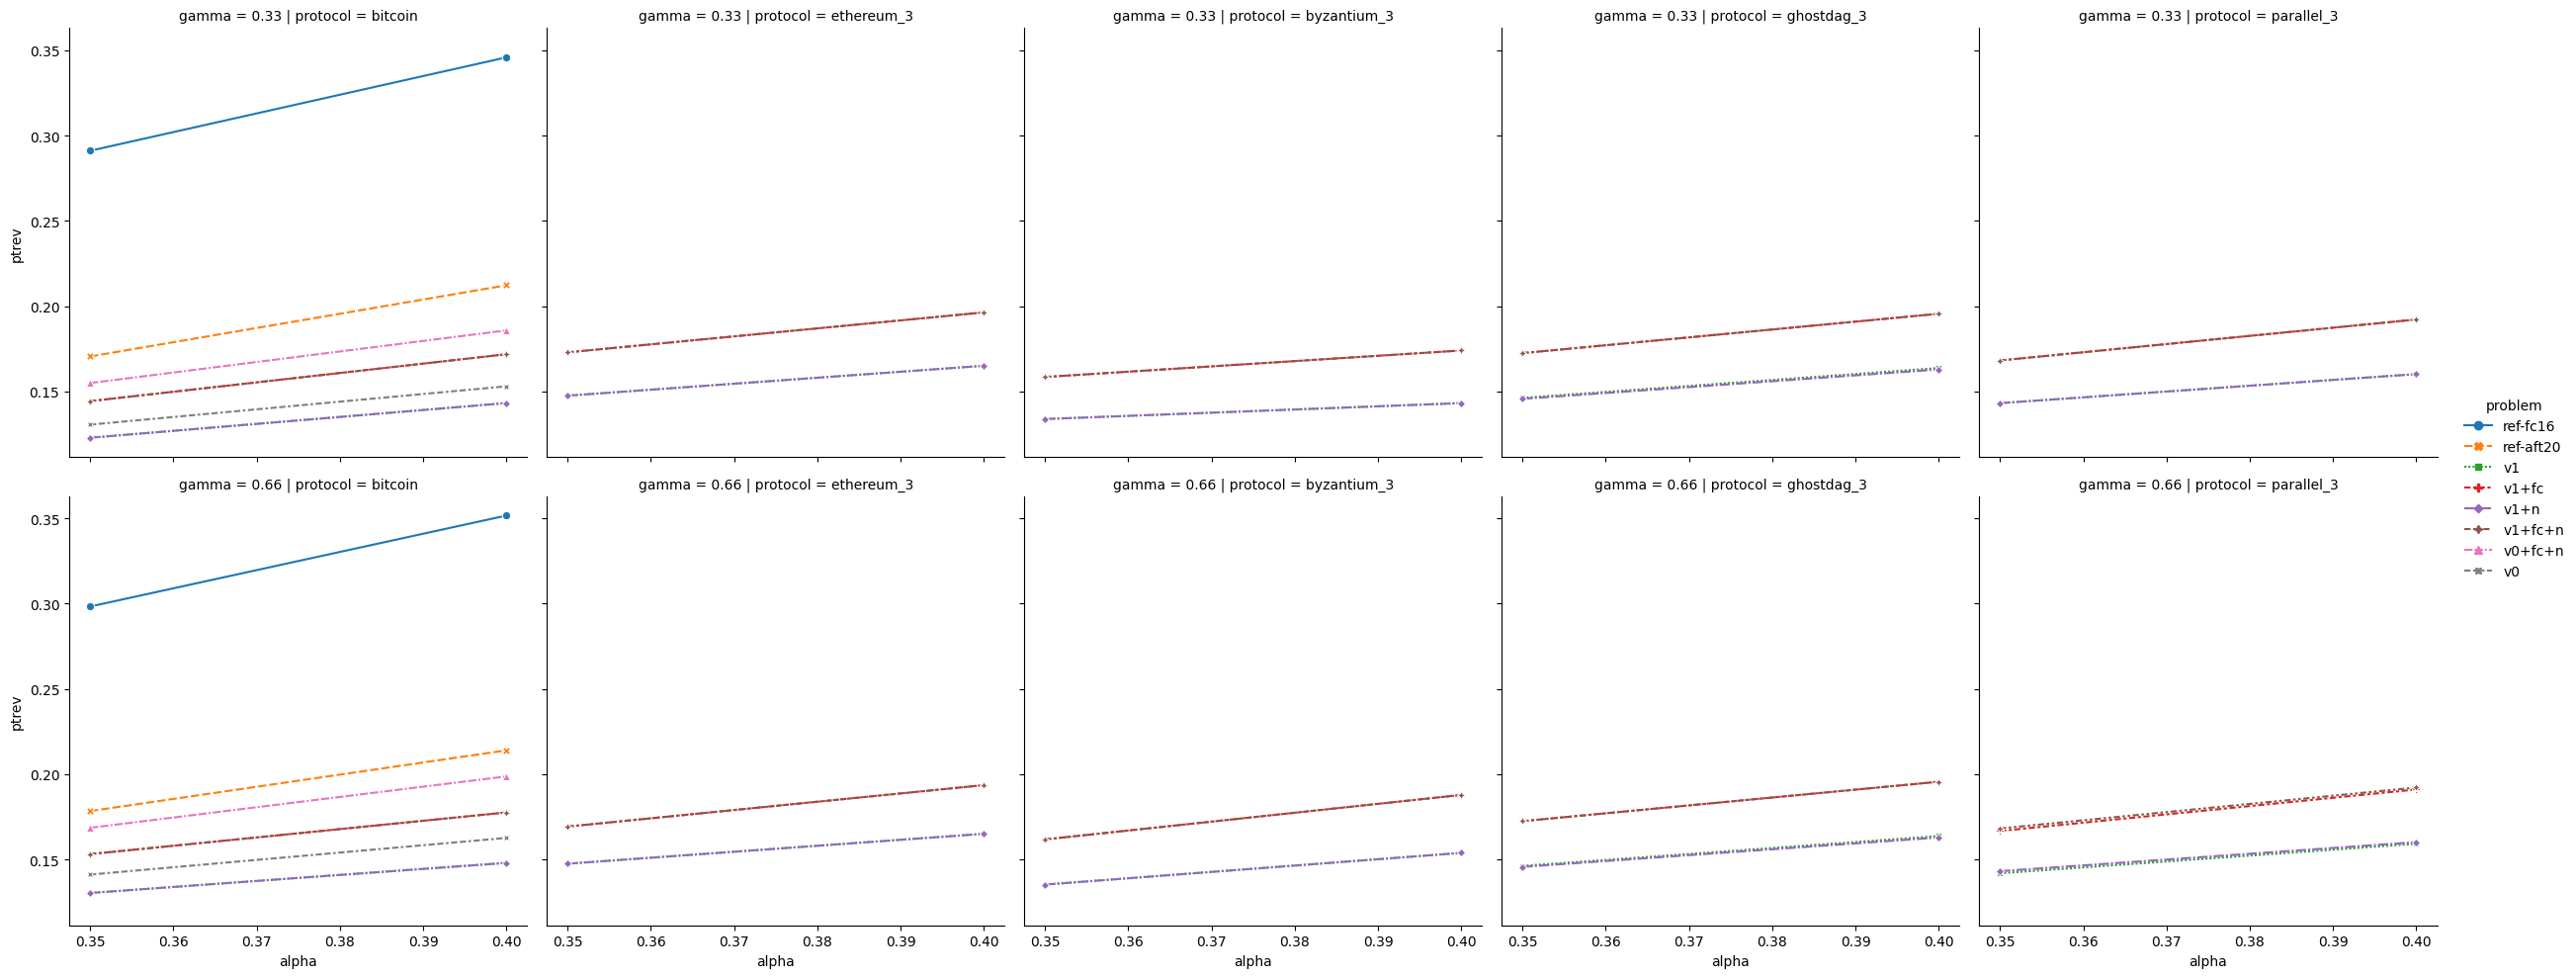

In [7]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="ptrev",
    col="protocol",
    hue="problem",
    style="problem",
    markers=True,
    row="gamma",
)